# Imports

In [138]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn._config import set_config
set_config(transform_output='pandas')
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# EDA

In [139]:
X, y = load_iris(return_X_y=True, as_frame=True)
print(X.shape, y.shape)
y.head(3)

(150, 4) (150,)


0    0
1    0
2    0
Name: target, dtype: int64

In [140]:
X.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [142]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

## notes

- only 150 rows
- there are no nulls/nans
- all data are floats
- 3 classes [0,1,2]

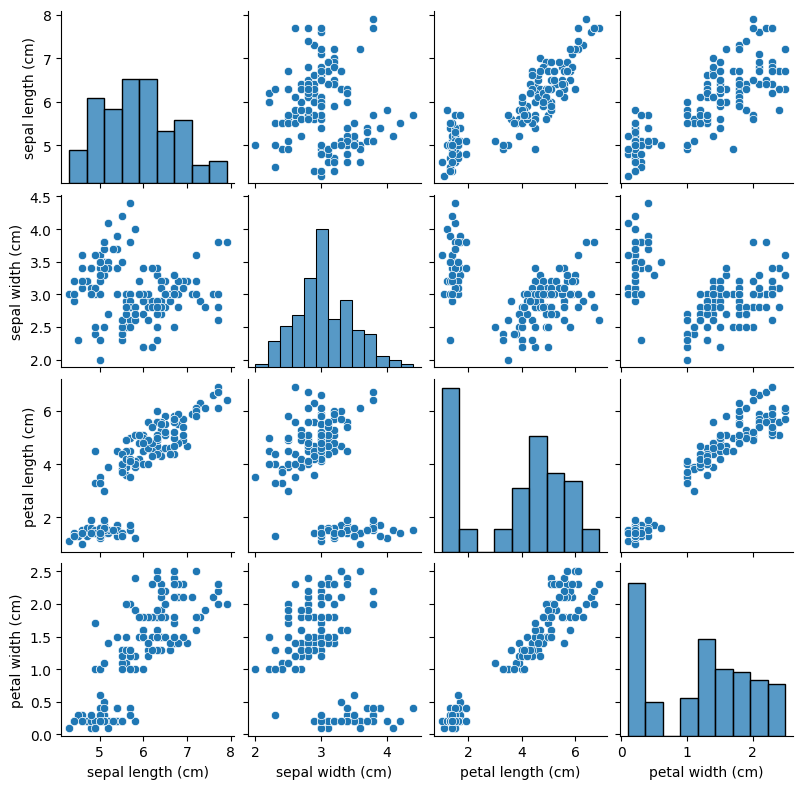

In [143]:
sns.pairplot(X, height=2)
plt.show()

- Dataset shows linear relationship 
- No significant outliers
- Our data is simple; we only have 150 observations and 4 features, logistic regression will be our estimator of choice.

# Model Training

In [144]:
rng = np.random.RandomState(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=rng)

In [145]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
     ('model', LogisticRegression())
])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

# Predictions

In [146]:
y_pred = pipe_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



- dataset is balanced; we will use accuracy as our metric

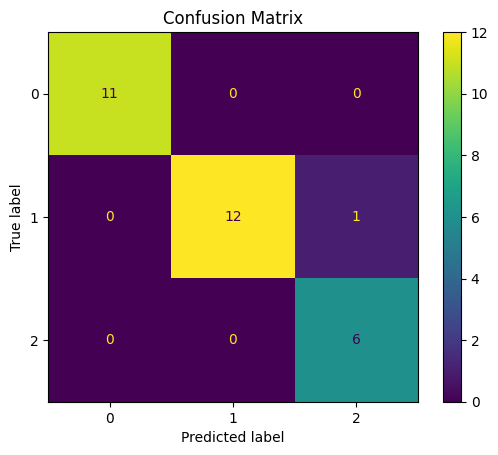

In [147]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()
